In [4]:
#import
import numpy as np
import matplotlib.pyplot as plt

In [9]:
A = np.array([[2, 1], [0, -1]])
B = np.array([[-2, 4, 5], [6, 7, 8]])
C = np.kron(A, B)
C

array([[-4,  8, 10, -2,  4,  5],
       [12, 14, 16,  6,  7,  8],
       [ 0,  0,  0,  2, -4, -5],
       [ 0,  0,  0, -6, -7, -8]])

In [5]:
T1 = np.random.rand(7, 8)
I = np.eye(6)

T2 = np.kron(T1, I) + np.kron(I, T1)

In [6]:
T2

array([[1.14125696, 0.31155051, 0.64957099, ..., 0.        , 0.        ,
        0.        ],
       [0.75095732, 0.98039281, 0.45844628, ..., 0.        , 0.        ,
        0.        ],
       [0.73682105, 0.09427362, 0.90556079, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.93453792, 0.63934877,
        0.76543448],
       [0.        , 0.        , 0.        , ..., 0.34766411, 0.45741504,
        0.62683501],
       [0.        , 0.        , 0.        , ..., 0.10798415, 0.36515371,
        0.63906061]])

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# SOURCE
def f(x, y):
    return np.sin(x**2 + y**2) * np.exp(-x**2 -y**2)

# MATRIX BUILDER
def poisson_Ab_builder(m, f):
    n = m**2
    A = np.zeros((n, n))
    b = np.zeros(n)

    # Grid spacing
    h = 1 / (m + 1)  

    # Function to calculate index in the vectorized form
    def idx(j, k):
        return j + m * k

    # Populate A based on the conditions
    for j in range(m):
        for k in range(m):
            i = idx(j, k)
            A[i, i] = 4  # Diagonal value

            if j > 0:
                A[i, idx(j - 1, k)] = -1  # Left
            if j < m - 1:
                A[i, idx(j + 1, k)] = -1  # Right
            if k > 0:
                A[i, idx(j, k - 1)] = -1  # Down
            if k < m - 1:
                A[i, idx(j, k + 1)] = -1  # Up

    # Assuming f_{j,k} is defined or can be generated to populate b
    # Example: filling b with some values, replace this with your actual f_{j,k} values
    f = np.random.rand(m, m)  # Example function values
    for j in range(m):
        for k in range(m):
            b[idx(j, k)] = h**2 * f[j, k]

    return A, b

In [6]:
A, b = poisson_Ab_builder(5, f)

In [7]:
def gauss_pivot(A: list = [], b: list = []):
    """
    Solves a linear system of equations using Gauss elimination. We manager case where pivot is null here.

    Args:
    A (numpy.ndarray): Coefficient matrix.
    b (numpy.ndarray): Right-hand side vector.

    Returns:
    x (numpy.ndarray): Solution vector.
    """
    n = len(b)
    x = np.zeros(n)

    for k in range(0, n-1):
        # Let's find for maximum pivot in column k
        row_with_max_pivot = k
        for i in range(k + 1, n):
            if abs(A[i, k]) > abs(A[row_with_max_pivot, k]):
                row_with_max_pivot = i
        
        A[[k, row_with_max_pivot]] = A[[row_with_max_pivot, k]]
        b[k], b[row_with_max_pivot] = b[row_with_max_pivot], b[k]

        if A[k][k] == 0:
            return np.zeros(n)

        # Let's transform the system into an upper triangular matrix.
        for i in range(k + 1, n):
            pivot = A[i, k] / A[k, k]
            for j in range(k, n):
                A[i, j] -= pivot * A[k, j]
            b[i] -= pivot * b[k]
            
    # Solving, let compute x
    for i in range(n - 1, -1, -1):
        x[i] = (b[i] - np.dot(A[i, i+1:], x[i+1:])) / A[i, i]

    return x

In [16]:
# Plot solution and right side
Solution = gauss_pivot(A, b)
h = 1 / (5 + 1)
x = np.linspace(0, 5**2)

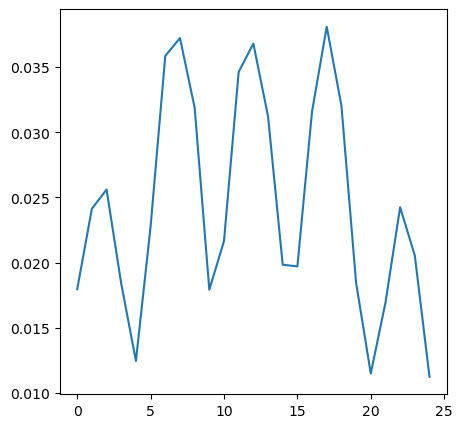

In [18]:
plt.figure(figsize=(5, 5))
plt.plot(Solution)
plt.show()

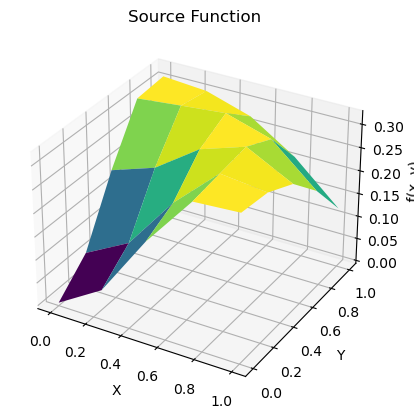

In [19]:
# Define grid points
n = 5  # Number of grid points in each dimension
x = np.linspace(0, 1, n)
y = np.linspace(0, 1, n)
X, Y = np.meshgrid(x, y)

# Evaluate source function on the grid
source_values = f(X, Y)

# Plot the source function
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, source_values, cmap='viridis')
ax.set_title('Source Function')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f(x, y)')
plt.show()

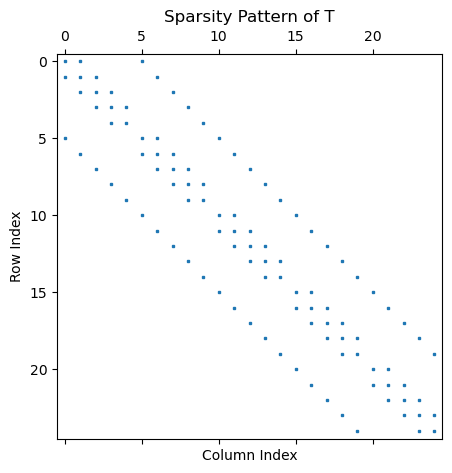

In [14]:
plt.figure(figsize=(5, 5))
plt.spy(A, markersize=2)
plt.title('Sparsity Pattern of T')
plt.xlabel('Column Index')
plt.ylabel('Row Index')
plt.show()